**Importing necessary libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation

**We load the dataset "Supermarket sales"**

In [2]:
a= pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")

**Displaying the first 5 rows of the dataset to understand the data better.**

In [3]:
a.head()


#Understanding the data:
# 1. (unit price * quantity) == cogs
# 2. tax 5% == gross income

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**Basic information about the dataset**

In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
a.describe()     #Statistical description

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


# Data Cleaning

**Checking for null values in the dataset**

In [6]:
mask1= a.isnull().sum()
mask1

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

**Checking for duplicated values in the dataset**

In [7]:
mask2= a.duplicated()
a[mask2]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


**We check for unique values and then change the data type of relevant columns so as to reduce memory usage**

In [8]:
a["Branch"].unique()

array(['A', 'C', 'B'], dtype=object)

In [9]:
a["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [10]:
a["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [11]:
a["Branch"]= a["Branch"].astype("category")
a["City"]= a["City"].astype("category")
a["Customer type"]= a["Customer type"].astype("category")
a["Gender"]= a["Gender"].astype("category")
a["Payment"]= a["Payment"].astype("category")
a["Date"]= pd.to_datetime(a["Date"], format= "%m/%d/%Y")

In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   category      
 2   City                     1000 non-null   category      
 3   Customer type            1000 non-null   category      
 4   Gender                   1000 non-null   category      
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

**Setting new index**

In [13]:
a.set_index("Invoice ID", inplace= True)

**Sorting values**

In [14]:
a.sort_values("Date", inplace= True)

# About the dataset

**We create a new column showing the per unit gross income earned**

In [15]:
a["Per unit gross income"]= a["gross income"] / a["Quantity"]
largest= a["Per unit gross income"].nlargest(5)
smallest = a["Per unit gross income"].nsmallest(5)

print(largest)
print(smallest)

Invoice ID
219-22-9386    4.9980
148-41-7930    4.9980
641-62-7288    4.9960
437-53-3084    4.9945
667-92-0055    4.9915
Name: Per unit gross income, dtype: float64
Invoice ID
333-23-2632    0.5040
239-48-4278    0.5065
516-77-6464    0.5080
784-21-9238    0.5085
115-38-7388    0.5090
Name: Per unit gross income, dtype: float64


**What is the Highest per unit gross income earned and from which product line?**

In [16]:
abt1= a.loc[a["Per unit gross income"].idxmax()]
print("Highest per unit gross income earned is", abt1["Per unit gross income"], "from the product line", abt1["Product line"])

Highest per unit gross income earned is 4.998 from the product line Sports and travel


**What is the Lowest per unit gross income earned and from which product line?**

In [17]:
abt2= a.loc[a["Per unit gross income"].idxmin()]
print("Lowest per unit gross income earned is", abt2["Per unit gross income"], "from the product line", abt2["Product line"])

Lowest per unit gross income earned is 0.504 from the product line Health and beauty


**Average gross income earned**

In [18]:
average_gp= a["gross income"].mean()
average_gp

15.379369

**Highest rated product lines**

In [19]:
hr= a.loc[a["Rating"].nlargest(7).index]
hr

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Per unit gross income
Invoice ID,,,,,,,,,,,,,,,,,
347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2019-02-03,13:40,Ewallet,495.63,4.761905,24.7815,10.0,2.7535
285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2019-02-15,17:47,Credit card,74.22,4.761905,3.7110,10.0,1.2370
725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2019-02-20,16:49,Credit card,323.20,4.761905,16.1600,10.0,1.6160
866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2019-02-25,11:58,Ewallet,527.90,4.761905,26.3950,10.0,2.6395
423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,2019-03-27,19:18,Ewallet,560.34,4.761905,28.0170,10.0,4.6695
662-72-2873,A,Yangon,Normal,Female,Food and beverages,40.94,5,10.2350,214.9350,2019-01-06,13:58,Ewallet,204.70,4.761905,10.2350,9.9,2.0470
109-28-2512,B,Mandalay,Member,Female,Fashion accessories,97.61,6,29.2830,614.9430,2019-01-07,15:01,Ewallet,585.66,4.761905,29.2830,9.9,4.8805


In [20]:
hcols=["Product line","Rating"]
det1= hr[hcols].head(5)
sorted_det1= det1.sort_values(by= "Product line")
print("The highest rated product lines and the ratings are as follows:\n\n", sorted_det1)

The highest rated product lines and the ratings are as follows:

                        Product line  Rating
Invoice ID                                 
866-70-2814  Electronic accessories    10.0
725-56-0833       Health and beauty    10.0
347-34-2234       Sports and travel    10.0
285-68-5083       Sports and travel    10.0
423-57-2993       Sports and travel    10.0


**Lowest rated product lines**

In [21]:
lr= a.loc[a["Rating"].nsmallest(12).index]
lr

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Per unit gross income
Invoice ID,,,,,,,,,,,,,,,,,
845-94-6841,C,Naypyitaw,Member,Female,Food and beverages,72.88,9,32.7960,688.7160,2019-01-08,19:38,Cash,655.92,4.761905,32.7960,4.0,3.6440
828-46-6863,A,Yangon,Member,Male,Food and beverages,98.53,6,29.5590,620.7390,2019-01-23,11:22,Credit card,591.18,4.761905,29.5590,4.0,4.9265
730-61-8757,B,Mandalay,Member,Male,Health and beauty,51.13,4,10.2260,214.7460,2019-01-25,10:11,Credit card,204.52,4.761905,10.2260,4.0,2.5565
836-82-5858,B,Mandalay,Member,Male,Health and beauty,69.37,9,31.2165,655.5465,2019-01-26,19:14,Ewallet,624.33,4.761905,31.2165,4.0,3.4685
182-69-8360,B,Mandalay,Normal,Female,Electronic accessories,23.65,4,4.7300,99.3300,2019-01-30,13:32,Credit card,94.60,4.761905,4.7300,4.0,1.1825
885-56-0389,C,Naypyitaw,Member,Male,Fashion accessories,52.35,1,2.6175,54.9675,2019-02-12,17:49,Cash,52.35,4.761905,2.6175,4.0,2.6175
576-31-4774,B,Mandalay,Normal,Female,Health and beauty,73.41,3,11.0115,231.2415,2019-03-02,13:10,Ewallet,220.23,4.761905,11.0115,4.0,3.6705
651-96-5970,A,Yangon,Normal,Male,Fashion accessories,46.41,1,2.3205,48.7305,2019-03-03,20:06,Credit card,46.41,4.761905,2.3205,4.0,2.3205
510-95-6347,B,Mandalay,Member,Female,Food and beverages,48.52,3,7.2780,152.8380,2019-03-05,18:17,Ewallet,145.56,4.761905,7.2780,4.0,2.4260


In [22]:
lcols=["Product line","Rating"]
det2= lr[lcols].head(11)
sorted_det2= det2.sort_values(by= "Product line")
print("The lowest rated product lines and the ratings are as follows:\n\n", sorted_det2)

The lowest rated product lines and the ratings are as follows:

                        Product line  Rating
Invoice ID                                 
182-69-8360  Electronic accessories     4.0
885-56-0389     Fashion accessories     4.0
651-96-5970     Fashion accessories     4.0
845-94-6841      Food and beverages     4.0
828-46-6863      Food and beverages     4.0
510-95-6347      Food and beverages     4.0
131-15-8856      Food and beverages     4.0
730-61-8757       Health and beauty     4.0
836-82-5858       Health and beauty     4.0
576-31-4774       Health and beauty     4.0
730-50-9884       Sports and travel     4.0


# 1. City-wise gross income earned

In [23]:
s= a.groupby("City")["gross income"].sum()
print (s)

City
Mandalay     5057.0320
Naypyitaw    5265.1765
Yangon       5057.1605
Name: gross income, dtype: float64


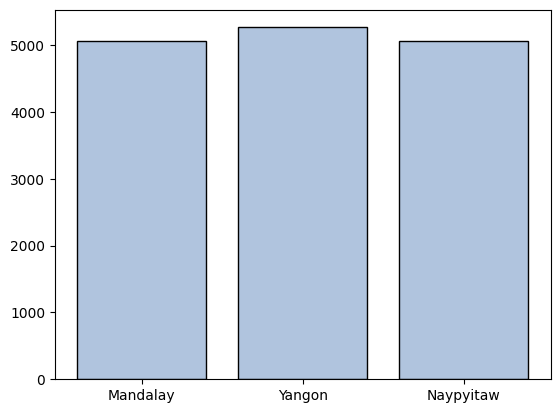

In [24]:
plt.bar(a["City"].unique(), s, edgecolor="black", color= "lightsteelblue")
plt.show()

Findings in (1):
* The gross income earned by each city branch is more or less the same
* City Yangon has the highest gross income earned

# 2. Customer Type and Gender Distribution

In [25]:
gp= a.groupby(["Customer type", "Gender"]).size()
gp

Customer type  Gender
Member         Female    261
               Male      240
Normal         Female    240
               Male      259
dtype: int64

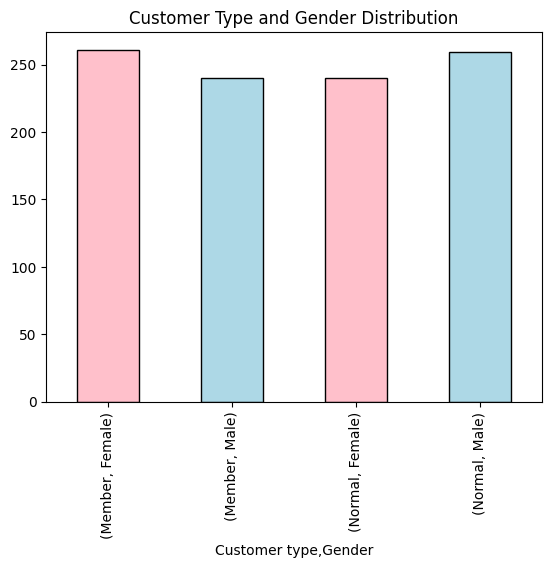

In [26]:
gp.plot(kind= "bar", color=["pink","lightblue"], edgecolor="black")
plt.title("Customer Type and Gender Distribution")
plt.show()

Findings in (2):
* Highest number of purchases is done by Female members followed by normal Male customers.
* The distribution is more or less equal

# 3. Gross income trend (1st Jan 2019 - 1st Apr 2019)

In [27]:
s1= a.groupby("Date")["gross income"].sum()
ss1= s1.sort_values(ascending= False)
print (ss1)

Date
2019-03-09    355.9070
2019-02-07    344.2005
2019-03-14    343.5540
2019-02-15    325.2755
2019-03-02    312.3955
                ...   
2019-02-18     71.2395
2019-03-07     68.4885
2019-02-21     66.3685
2019-03-18     61.5635
2019-02-13     44.4875
Name: gross income, Length: 89, dtype: float64


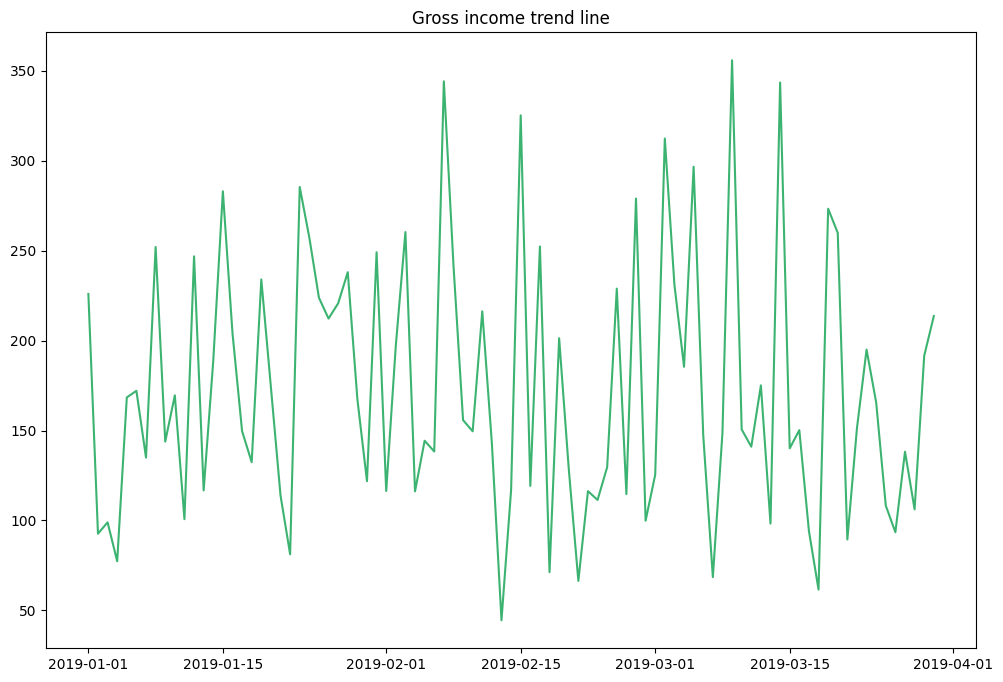

In [28]:
plt.figure(figsize=(12,8))
plt.plot(a["Date"].unique(), s1, color= "mediumseagreen")
plt.title("Gross income trend line")
plt.show()

Findings in (3):
* There is a regular pattern seen in the trend
* Highest gross income is reached in first week of March 2019
* Lowest gross income is touched in second week of February 2019

# 4. Gross income earned wrt. product line

In [29]:
s2= a.groupby("Product line")["gross income"].sum()
s2

Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64

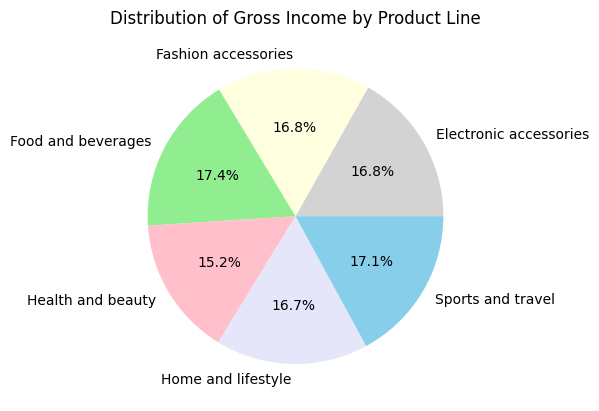

In [30]:
plt.pie(s2, autopct='%.1f%%', labels= s2.index, colors=["lightgrey","lightyellow","lightgreen","pink","lavender","Skyblue"])
plt.title("Distribution of Gross Income by Product Line")
plt.show()

Findings in (4):
* Gross income distribution among product lines are more or less equal
* Food and beverages has the highest gross income earned
* Health and beauty has the lowest gross income earned

# 5. Payment method distribution

In [31]:
pay= a["Payment"].value_counts()
pay

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

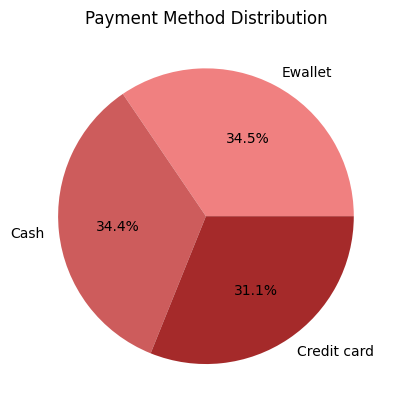

In [32]:
plt.pie(pay, autopct='%.1f%%', labels= pay.index, colors=["lightcoral","indianred","brown"])
plt.title("Payment Method Distribution")
plt.show()

Findings in (5):
* Payment method distribution is more or less equal

# Conclusion
The analysis of the "Supermarket Sales" dataset provides insights into the dynamics of supermarket sales. After cleaning the data and describing the data briefly, we have done detailed analysis on:
1. City-wise gross income
2. Customer Type and Gender Distribution
3. Gross income trend (1st Jan 2019–1st Apr 2019)
4. Gross income earned wrt. product line
5. Payment method distribution